Problem 3

In [ ]:
from collections import deque

def minimum_swaps(graph, control, target):
    if control == target:
        return 0
    queue = deque([(control, 0)])
    visited= set()
    visited.add(control)

    while queue:
        current, distance = queue.popleft()
        if current == target:
            return (distance -1)*2 # we multiplied by 2 to return it to its original position
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, distance+1))
    
    return -1

I used Breadth-First Search (BFS), since it guarantees the shortest path in an unweighted graph. If we find the shortest path between the control qubit and the target qubit we just subtract from their distance -1 and then multiply by 2 to account for the target qubit going back to its original position.

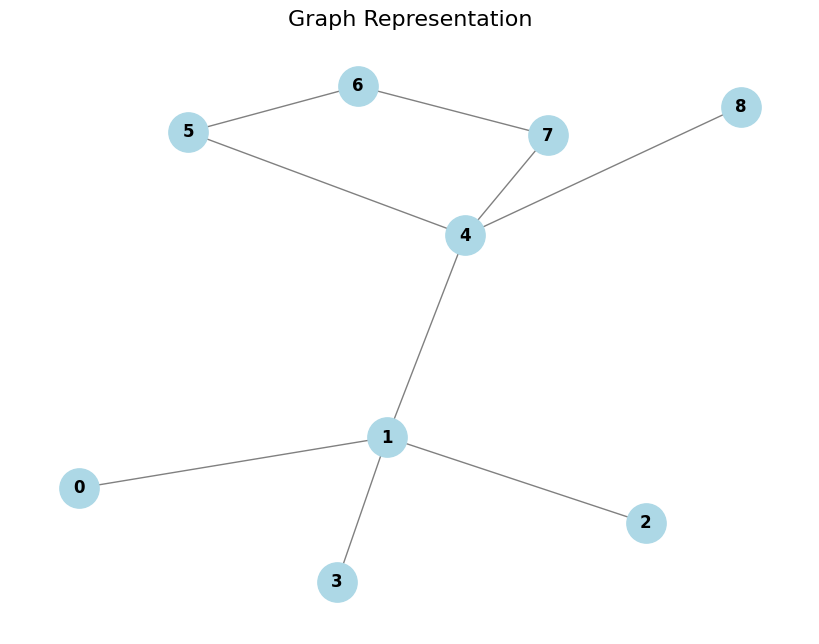

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    0: [1],
    1: [0, 2, 3, 4],
    2: [1],
    3: [1],
    4: [1, 5, 7, 8],
    5: [4, 6],
    6: [5, 7],
    7: [4, 6],
    8: [4]
}

# Create a NetworkX graph object
G = nx.Graph()

# Add edges to the graph from the adjacency list
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_weight='bold', edge_color='gray')
plt.title("Graph Representation", fontsize=16)
plt.show()

In [4]:
# Test
control = 0
target = 4
result = minimum_swaps(graph, control, target)
print(f"Minimum number of SWAP gates required: {result}")

Minimum number of SWAP gates required: 2
